# Exploratory Data Analysis

### Roles to Explore:

In [4]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleaning
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

c:\Users\vikra\Desktop\Data analyst Luke\python\3_project\env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Filter for Indian Data Analyst roles

In [9]:
df_DA_India = df[(df['job_title_short'] == 'Data Analyst' ) & (df['job_country'] == 'India')]

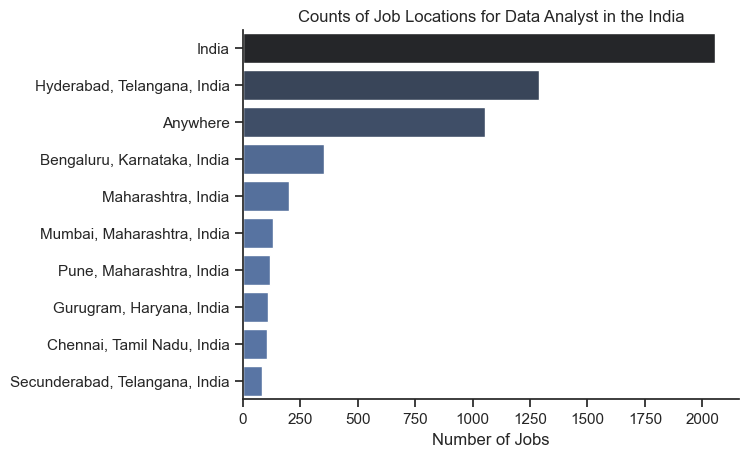

In [23]:
df_plot = df_DA_India['job_location'].value_counts().head(10).to_frame() #top 10 jbo locations in india

sns.set_theme(style='ticks')

sns.barplot(data=df_plot,x='count',y='job_location',hue='count',palette='dark:b_r',legend=False)
sns.despine() # removes the lines(border) around graph
plt.title('Counts of Job Locations for Data Analyst in the India')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()

### Job Opportunities

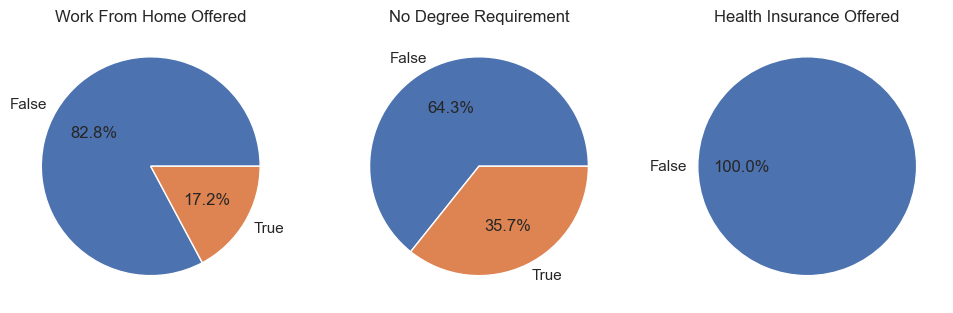

In [38]:

dict_column = {
    'job_work_from_home':'Work From Home Offered',
    'job_no_degree_mention':'No Degree Requirement',
    'job_health_insurance' :'Health Insurance Offered'
}

fig, ax = plt.subplots(1,3)
fig.set_size_inches(12,5)

for i,(column,title) in enumerate(dict_column.items()):
    values = df_DA_India[column].value_counts().index #retunes unique values of column for labeling on plots
    ax[i].pie(df_DA_India[column].value_counts(),labels=values.astype(str), autopct = '%1.1f%%')
    ax[i].set_title(title)


### Companies to Explore

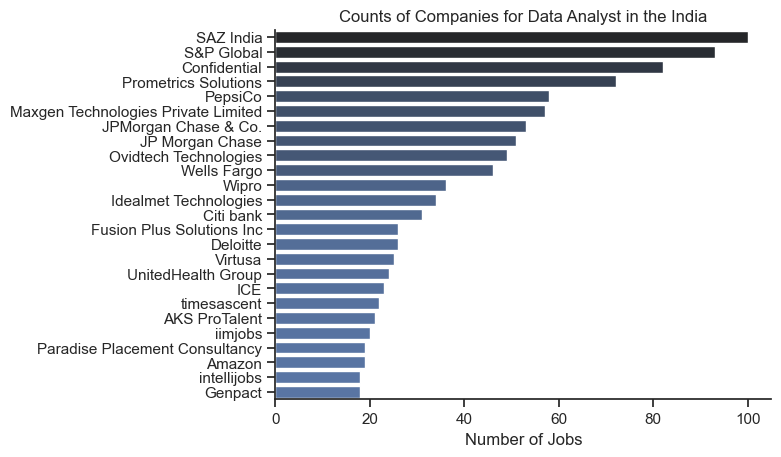

In [42]:
df_plot = df_DA_India['company_name'].value_counts().head(25).to_frame() #top 25 companies in india by data

sns.set_theme(style='ticks')

sns.barplot(data=df_plot,x='count',y='company_name',hue='count',palette='dark:b_r',legend=False)
sns.despine() # removes the lines(border) around graph
plt.title('Counts of Companies for Data Analyst in the India')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()